<a href="https://colab.research.google.com/github/hlberghout/CHEM4420/blob/main/11_93_HO_Wavefunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solutions of HO**

11.93. Graph the first five wavefunctions for the harmonic oscillator and their probabilities.  Superimpose these graphs on the potential energy function for a harmonic oscillator and numerically determine the x values of the classical turning points.  What is the probability that an oscillator will exist beyond the classical turning points?  Do plots of the probability begin to show a distribution as expected by the correspondence principle?
---



This is a text block than can be used to explain sections of code in the program or even write a complete report.  Comments within the code block can also be used as demonstrated below.  The first code block of this notebook is a library declaration block defining the libraries the contain the functions that we will use and the notebook scrip that follows and how those functions are called.

In [ ]:
#note that any input following a pound symbol is a comment and is ignored by the intepreter.
import matplotlib #Matplotlib is a python plotting library used in this example.
import matplotlib.pyplot as plt #pyplot provides a matlab like plotting function.
import numpy as np #NumPy is the fundamental scientific computing package in Python.
import scipy.constants as constants #SciPy physical constants library, SI units.
import scipy.integrate as integrate #SciPy Integration library
import scipy.optimize as optimize
import scipy.special as special #SciPy special functions library
import seaborn #matplotlib enhancement.
from IPython.display import Latex #library to allow creation of pretty formulas written in LATEX

This block defines the initial values of variable that are not defined elsewhere in the imported libraries above.

In [ ]:
# Defined variables
k = 1.0 #Spring constant (N/m)
m = 10.0 #mass of oscillator (kg)

The quantum mechanical harmonic oscillator potential energy operator is derived from the classical harmonic oscillator potential energy function::

$$ \hat V = \tfrac 1 2 k \hat x^2 $$

Inserting the resulting Hamiltonian into the Schrödinger equation gives:

$$ \left[ - \frac \hbar {2m} \frac {d^2x}{dt^2} + \frac 1 2 kx \right] \psi = E \psi $$

The eigenfunctions, which are the solutions of this differential equation are products of one of the Hermite polynomials and a Gaussian function:

$$ \psi_n (x) = \left( \frac \alpha \pi \right)^{1/4} \cdot \left( \frac 1 {2^n n!} \right)^{1/2} \cdot H_n( \alpha^{1/2} x ) \cdot \operatorname e ^{- \alpha x^2 / 2} $$

The $H_n$ is the $n$<sup>th</sup> Hermite polynomial.  The exponential factor is a Gaussian function.  The factors to the left of the Hermite polynomial make up the normalization constant, which depends on the value of $n$.  The constant $\alpha$ is related to the force constant for the oscillator and the effective mass of the oscillator as 

$$\alpha = \frac {\sqrt{km}} {\hbar} $$ 

Hermite polynomials are solutions of the differential equation known as Hermite's equation:

$$ H_n'' - 2 \xi H_n' + 2n H_n = 0 $$

The Hermite polynomials make up a complete, infinite, orthogonal set.  

$$ \int_{-\infty}^{+\infty} H_{n'}H_{n} \operatorname e ^{-\xi^2} \operatorname d \xi = \left\{
\begin{matrix}
0 & {\text {if } n' \neq n} \\
\pi^{1/2}2^n n! & {\text {if } n' = n}
\end{matrix}
\right. $$

The first seven members of the set are:

| $n$ | $H_n(\xi)$ |
| ---    | ---    |
| $0$ | $1$ |
| $1$ | $2 \xi$ |
| $2$ | $4 \xi^2 - 2$ |
| $3$ | $8 \xi^3 - 12 \xi$ | 
| $4$ | $16 \xi^4 - 48 \xi^2 + 12$ |
| $5$ | $32 \xi^5 - 160 \xi^3 + 120 \xi $ |
| $6$ | $64 \xi^6 - 480 \xi^4 + 720 \xi^2 - 120$ |

They exhibit the recursion relationship:

$$ H_{n+1} = 2 \xi H_n - 2n H_{n-1}$$

This relationship allows you to write down the $H_7$ polynomial by combining the $H_6$ and $H_5$ polynomials and, in principle, makes it possible to write down any one of the Hermite polynomials from the previous two.

The eigenvalue associated with each eigenfunction is:

$$ E_n = h \nu \left(n + \tfrac 1 2 \right) $$

where the vibrational frequency in Hertz, (cycles per second, $s^{-1}$) is: 

$$ \nu = \frac 1 {2 \pi} \sqrt{ \frac k m } $$

The following code calculates and plots the solution of the classical harmonic oscillator.

In [ ]:
#Define the harmonic oscillator potential energy function
def V(x):
    return k*x**2/2

In [ ]:
#Define the solution of the harmonic oscillator energy function
def E(n):
   return constants.h/(2*constants.pi)*np.sqrt(k/m)*(n+0.5)

Finally, this block of code produces the plot that allows us to visually compare these three functions.

ValueError: ignored

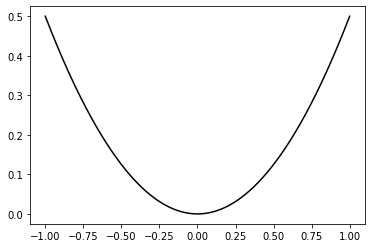

In [ ]:
#Set up the plot range
x_range = 1.0
steps = 500
x = np.linspace(-x_range, x_range, steps) #position range variable
#Plot the solution.
fig = plt.figure()
ax = plt.axes()
ax.plot(x,V(x), 'k')
ax.plot(x,E(0), 'b')
ax.set(xlabel='Position (m)', ylabel='Energy (J)',
       title="Harmonic Oscillator")
ax.grid()
#plt.ylim(-rmax*0.05,rmax)
plt.ticklabel_format(style='sci', axis='both',scilimits=(-3,4), useMathText='True')
plt.show()